# I. Data Description

In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
data = pd.read_csv("BlackFriday.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
data.shape

(537577, 12)

In [6]:
#
TotalSales = data.Purchase.sum()
print(TotalSales)

5017668378


In [7]:
# Describtion
print(data.describe())

            User_ID    Occupation  Marital_Status  Product_Category_1  \
count  5.375770e+05  537577.00000   537577.000000       537577.000000   
mean   1.002992e+06       8.08271        0.408797            5.295546   
std    1.714393e+03       6.52412        0.491612            3.750701   
min    1.000001e+06       0.00000        0.000000            1.000000   
25%    1.001495e+06       2.00000        0.000000            1.000000   
50%    1.003031e+06       7.00000        0.000000            5.000000   
75%    1.004417e+06      14.00000        1.000000            8.000000   
max    1.006040e+06      20.00000        1.000000           18.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       370591.000000       164278.000000  537577.000000  
mean             9.842144           12.669840    9333.859853  
std              5.087259            4.124341    4981.022133  
min              2.000000            3.000000     185.000000  
25%              5.000000  

In [8]:
print('Occupation',data.Occupation.unique())
print('Product_Category_1',data.Product_Category_1.unique())
print('City_Category',data.City_Category.unique())
print('Stay_In_Current_City_Years',data.Stay_In_Current_City_Years.unique())
print('Marital_Status',data.Marital_Status.unique())

Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Product_Category_1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
City_Category ['A' 'C' 'B']
Stay_In_Current_City_Years ['2' '4+' '3' '1' '0']
Marital_Status [0 1]


In [9]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [10]:
data.isnull().sum()/data.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.310627
Product_Category_3            0.694410
Purchase                      0.000000
dtype: float64

In [11]:
data.drop(['Product_Category_2','Product_Category_3'],axis = 1)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
Customer_numbers = len(data['User_ID'].unique())
Product_numbers = len(data['Product_ID'].unique())
print('We have',Customer_numbers, 'customers','and',Product_numbers,'products')

We have 5891 customers and 3623 products


In [13]:
AgeToRecord_distribution = data.groupby('Age',as_index = False).count()
AgeToRecord_distribution.head()

,Age,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,14707,14707,14707,14707,14707,14707,14707,14707,10466,4789,14707
1,18-25,97634,97634,97634,97634,97634,97634,97634,97634,68256,30889,97634
2,26-35,214690,214690,214690,214690,214690,214690,214690,214690,147745,65916,214690
3,36-45,107499,107499,107499,107499,107499,107499,107499,107499,74169,32758,107499
4,46-50,44526,44526,44526,44526,44526,44526,44526,44526,30441,13135,44526


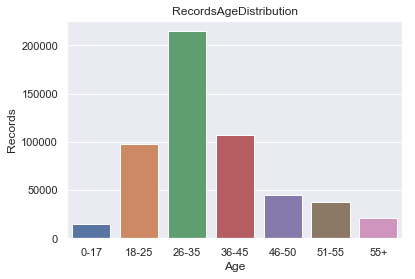

In [14]:
AgeToRecord_distribution = sns.barplot('Age', 'User_ID', data=AgeToRecord_distribution)
AgeToRecord_distribution.set_ylabel('Records')
AgeToRecord_distribution.set_title('RecordsAgeDistribution')

plt.show()

In [15]:
AgeToSales_distribution = data.groupby('Age',as_index = False).sum()
AgeToSales_distribution.head()

,Age,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,14746359773,129278,0,72599,94435.0,56751.0,132659006
1,18-25,97904093780,657774,20641,488498,646679.0,382878.0,901669280
2,26-35,215350137743,1696554,84166,1120056,1449438.0,833751.0,1999749106
3,36-45,107824726995,951060,42507,579163,738302.0,417688.0,1010649565
4,46-50,44666364150,379645,32194,250663,309804.0,169940.0,413418223


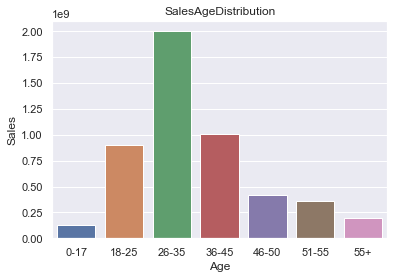

In [16]:
AgeToSales_distribution = sns.barplot('Age', 'Purchase', data=AgeToSales_distribution)
AgeToSales_distribution.set_ylabel('Sales')
AgeToSales_distribution.set_title('SalesAgeDistribution')
plt.show()

In [17]:
CategoryToRecord_distribution = data.groupby('Product_Category_1',as_index = False).sum()
CategoryToRecord_distribution.head()

,Product_Category_1,User_ID,Occupation,Marital_Status,Product_Category_2,Product_Category_3,Purchase
0,1,138766965949,1144694,55123,1020975.0,1146723.0,1882666325
1,2,23569592048,194959,9553,150528.0,170323.0,264497242
2,3,19907401743,156392,7691,88110.0,100447.0,200412211
3,4,11601825250,91962,4495,68442.0,55754.0,26937957
4,5,149035496480,1187949,60181,939461.0,264880.0,926917497


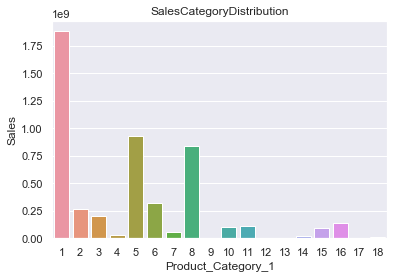

In [18]:
CategoryToRecord_distribution = sns.barplot('Product_Category_1', 'Purchase', data=CategoryToRecord_distribution)
CategoryToRecord_distribution.set_ylabel('Sales')
CategoryToRecord_distribution.set_title('SalesCategoryDistribution')
plt.show()

In [19]:
AgeToRecord_distribution = data.groupby('Age',as_index = False).sum()
AgeToRecord_distribution.head()

,Age,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,14746359773,129278,0,72599,94435.0,56751.0,132659006
1,18-25,97904093780,657774,20641,488498,646679.0,382878.0,901669280
2,26-35,215350137743,1696554,84166,1120056,1449438.0,833751.0,1999749106
3,36-45,107824726995,951060,42507,579163,738302.0,417688.0,1010649565
4,46-50,44666364150,379645,32194,250663,309804.0,169940.0,413418223


In [20]:
Customer_distribution = data.groupby('User_ID',as_index = False).sum()[['User_ID','Purchase']]
Customer_distribution_ID = Customer_distribution.loc[Customer_distribution['Purchase']==Customer_distribution.Purchase.max(),]
Max_customer=data.loc[data['User_ID']==Customer_distribution_ID['User_ID'].iloc[0],]
print(Max_customer.shape)
Max_customer.head()

(978, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
27930,1004277,P00034742,M,36-45,16,A,0,0,5,14.0,17.0,8763
27931,1004277,P00028542,M,36-45,16,A,0,0,6,8.0,14.0,20400
27932,1004277,P00116842,M,36-45,16,A,0,0,2,5.0,8.0,16070
27933,1004277,P00063342,M,36-45,16,A,0,0,1,2.0,9.0,15193
27934,1004277,P00359042,M,36-45,16,A,0,0,2,8.0,14.0,12750


# II. Naive model

### EveryoneBuyAverage Navie model

In [21]:
Average = data.loc[:,'Purchase'].mean()

In [22]:
data.loc[:,'EveryoneBuyAverage'] = Average

In [23]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,EveryoneBuyAverage
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,9333.859853
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,9333.859853
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,9333.859853
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,9333.859853
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,9333.859853


### Time_in_City Navie model

In [24]:
Time_Stay_In_City = data.groupby(['Stay_In_Current_City_Years'],as_index = False).Purchase.mean()
Time_Stay_In_City

,Stay_In_Current_City_Years,Purchase
0,0,9247.238625
1,1,9319.865095
2,2,9397.607316
3,3,9350.685121
4,4+,9346.370158


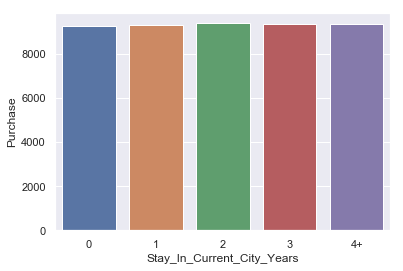

In [25]:
Time_Stay_In_City_distribution = sns.barplot('Stay_In_Current_City_Years','Purchase',data=Time_Stay_In_City)

### Gender Navie model

In [26]:
Gender = data.groupby(['Gender'],as_index = False).Purchase.mean()
Gender

,Gender,Purchase
0,F,8809.761349
1,M,9504.771713


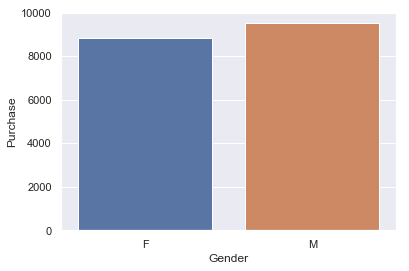

In [27]:
Gender_distribution = sns.barplot('Gender','Purchase',data=Gender)

In [28]:
data_Gender = data[:]
data_Gender.loc[data_Gender['Gender'] == 'M','Gender_Pred'] = 0

/Users/raphaleju/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/raphaleju/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [29]:
data_Gender = data[:]
data_Gender.loc[:,'Gender_Pred'] = Gender['Purchase'][0]
data_Gender.loc[data_Gender['Gender'] == 'M','Gender_Pred'] = Gender['Purchase'][1]

/Users/raphaleju/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/raphaleju/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Occupation Navie model

In [30]:
Occupation = data.groupby(['Occupation'],as_index = False).Purchase.mean()

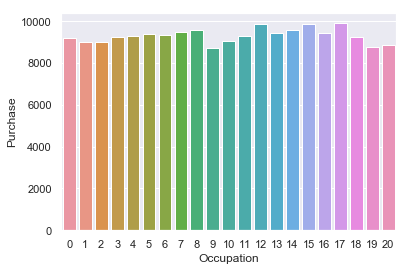

In [31]:
Occupation_distribution = sns.barplot('Occupation','Purchase',data=Occupation)

### City Category Naive Model

In [32]:
City_Category = data.groupby(['City_Category'],as_index = False).Purchase.mean()
City_Category

,City_Category,Purchase
0,A,8958.011014
1,B,9198.657848
2,C,9844.441855


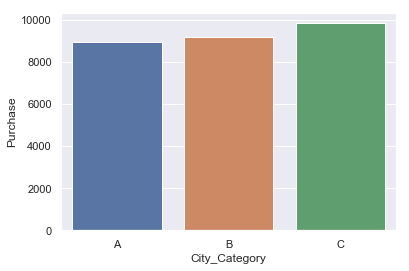

In [33]:
City_Category_distribution = sns.barplot('City_Category','Purchase',data=City_Category)

### Age Naive Model 

In [34]:
Age = data.groupby(['Age'],as_index = False).Purchase.mean()
Age

,Age,Purchase
0,0-17,9020.126878
1,18-25,9235.197575
2,26-35,9314.588970
3,36-45,9401.478758
4,46-50,9284.872277
5,51-55,9620.616620
6,55+,9453.898579


In [35]:
data_Age= data[:]
data_Age.loc[:,'Age_Pred'] = 0
for i in range(6):
    data_Age.loc[data_Age['Age'] == Age['Age'][i],'Age_Pred']= Age.loc[:,'Purchase'][i]
data_Age.head()

/Users/raphaleju/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/raphaleju/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,EveryoneBuyAverage,Age_Pred
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,9333.859853,9020.126878
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,9333.859853,9020.126878
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,9333.859853,9020.126878
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,9333.859853,9020.126878
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,9333.859853,0.000000


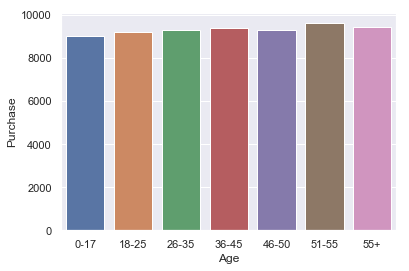

In [36]:
Age_distribution = sns.barplot('Age','Purchase',data=Age)

### Product Category Naive Model 

In [37]:
Product_Category_1 = data.groupby(['Product_Category_1'],as_index = False).Purchase.mean()
Product_Category_1

,Product_Category_1,Purchase
0,1,13607.701495
1,2,11255.680752
2,3,10096.841705
3,4,2328.862886
4,5,6238.004045
5,6,15837.893573
6,7,16373.830153
7,8,7497.354850
8,9,15538.297030
9,10,19679.974364


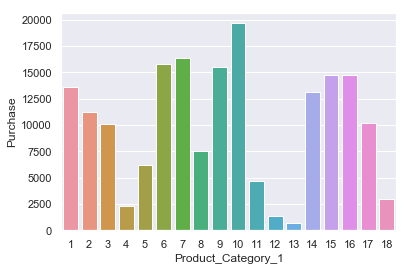

In [38]:
Product_Category_1_distribution = sns.barplot('Product_Category_1','Purchase',data=Product_Category_1)

In [39]:
data_Category = data[:]
data_Category.loc[:,'Category_Prediction'] = 0
for i in range(18):
    data_Category.loc[data_Category['Product_Category_1'] == i,'Category_Prediction']= Product_Category_1.loc[:,'Purchase'][i]
data_Category.head()

/Users/raphaleju/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/raphaleju/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,EveryoneBuyAverage,Category_Prediction
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,9333.859853,2328.862886
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,9333.859853,11255.680752
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,9333.859853,722.619485
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,9333.859853,722.619485
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,9333.859853,15538.297030


In [40]:
Product_Predict = data.groupby(['Product_ID'],as_index = False).Purchase.mean()

### Product Naive Model 

In [41]:
data_Product_ID = data[:]
data_Product_ID.loc[:,'Product_ID_Pred'] = 0
for i in range(3623):
    data_Product_ID.loc[data_Product_ID['Product_ID'] == Product_Predict['Product_ID'][i],'Product_ID_Pred']= Product_Predict.loc[:,'Purchase'][i]
data_Product_ID.head()

/Users/raphaleju/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/raphaleju/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,EveryoneBuyAverage,Product_ID_Pred
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,9333.859853,11863.760181
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,9333.859853,16293.307018
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,9333.859853,1240.323232
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,9333.859853,1455.062874
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,9333.859853,7718.695000


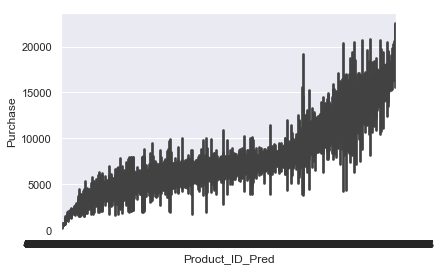

In [42]:
Product_ID_distribution = sns.barplot('Product_ID_Pred','Purchase',data=data_Product_ID)

# Naive Model Test

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Performance for Average Prediction Navie model

In [44]:
y_true = data_Category['Purchase']
y_pred = data_Category['EveryoneBuyAverage']
mean_squared_error(y_true, y_pred)**0.5

4981.0174998090461

In [45]:
y_true = data_Category['Purchase']
y_pred = data_Category['EveryoneBuyAverage']
r2_score(y_true, y_pred)

0.0

#### Performance for Category Prediction Navie model

In [46]:
y_true = data_Category['Purchase']
y_pred = data_Category['Category_Prediction']
mean_squared_error(y_true, y_pred)**0.5

7580.4221223024952

In [47]:
y_true = data_Category['Purchase']
y_pred = data_Category['Category_Prediction']
r2_score(y_true, y_pred)

-1.3160644774531463

#### Performance for ProductID Prediction Navie model

In [48]:
y_true = data_Product_ID['Purchase']
y_pred = data_Product_ID['Product_ID_Pred']
mean_squared_error(y_true, y_pred)**0.5

2658.7572288103825

In [49]:
y_true = data_Product_ID['Purchase']
y_pred = data_Product_ID['Product_ID_Pred']
r2_score(y_true, y_pred)

0.71508111748664904

#### Performance for Gender Navie model

In [50]:
y_true = data_Gender['Purchase']
y_pred = data_Gender['Gender_Pred']
mean_squared_error(y_true, y_pred)**0.5

4972.0177677764104

In [51]:
y_true = data_Gender['Purchase']
y_pred = data_Gender['Gender_Pred']
r2_score(y_true, y_pred)

0.0036103473430111332

#### Performance for Age Navie model

In [52]:
y_true = data_Age['Purchase']
y_pred = data_Age['Age_Pred']
mean_squared_error(y_true, y_pred)**0.5

5317.3093669569353

In [53]:
y_true = data_Age['Purchase']
r2_score(y_true, y_pred)

-0.13958761969401046

# III. Random Forest Model

The random forest model section has a lot of ideas coming from a kernel in Kaggle, here is the link

https://www.kaggle.com/sungsujaing/blackfriday-eda-randomforestprediction

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
data.fillna(0,inplace=True)

In [57]:
data = data.drop(['Product_Category_2','Product_Category_3'],axis = 1)

Set the dummy variables

In [58]:
le_U_ID = LabelEncoder()
data['User_ID'] = le_U_ID.fit_transform(data['User_ID'])
le_P_ID = LabelEncoder()
data['Product_ID'] = le_P_ID.fit_transform(data['Product_ID'])
data['Gender'] = np.where(data['Gender']=='M',1,0) # Female: 0, Male: 1
data_Age = pd.get_dummies(data.Age)
data_CC = pd.get_dummies(data.City_Category)
data_SIC = pd.get_dummies(data.Stay_In_Current_City_Years)
data_encoded = pd.concat([data,data_Age,data_CC,data_SIC],axis=1)
data_encoded.drop(['Age','City_Category','Stay_In_Current_City_Years'],axis=1,inplace=True)

Split the dataset

In [59]:
data_frac = data_encoded.sample(frac=0.02,random_state=100)
X = data_frac.drop(['Purchase'], axis=1)
y = data_frac['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Find the optimal hyperparameters(tree numbers)

Best parameter: {'n_estimators': 240}
Best score: 3016.77


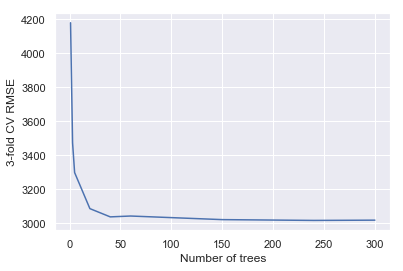

In [60]:
param_grid = {'n_estimators':[1,3,5,20,40,60,150,240,300]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train_scaled,y_train)
plt.figure()
plt.plot(list(param_grid.values())[0],(-1*grid_rf.cv_results_['mean_test_score'])**0.5)
plt.xlabel('Number of trees')
plt.ylabel('3-fold CV RMSE')
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'n_estimators': 240}
Best score: 3018.97


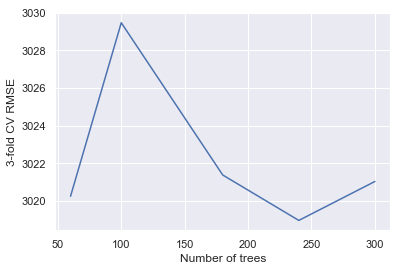

In [61]:
param_grid = {'n_estimators':[60,100,180,240,300]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train_scaled,y_train)
plt.figure()
plt.plot(list(param_grid.values())[0],(-1*grid_rf.cv_results_['mean_test_score'])**0.5)
plt.xlabel('Number of trees')
plt.ylabel('3-fold CV RMSE')
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

Find the max depth

In [62]:
param_grid = {'n_estimators':[60,100,180,240,300],'max_depth':[1,3,5,7,9]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train_scaled,y_train)

In [63]:
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'max_depth': 7, 'n_estimators': 240}
Best score: 2967.61


In [64]:
train_sizes, train_scores, valid_scores = learning_curve(RandomForestRegressor(max_depth=7, n_estimators=150), X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')

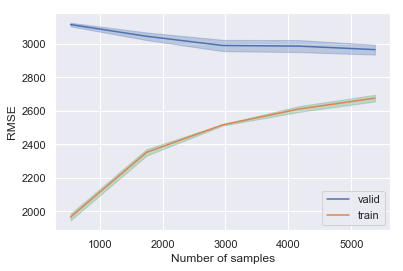

In [65]:
train_scores = (-1*train_scores)**0.5
valid_scores = (-1*valid_scores)**0.5
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.plot(train_sizes,valid_scores_mean,label='valid')
plt.plot(train_sizes,train_scores_mean,label='train')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3,color="g")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,valid_scores_mean + valid_scores_std, alpha=0.3, color="b")
plt.xlabel('Number of samples')
plt.ylabel('RMSE')
plt.legend()

Find relevance of independent variables

Text(0.5,0,'relative importance')

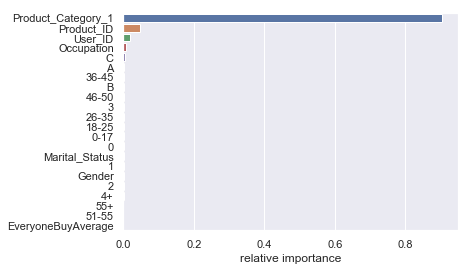

In [66]:
rf = RandomForestRegressor(max_depth=7, n_estimators=180).fit(X_train_scaled,y_train)
f_im = rf.feature_importances_.round(3)
ser_rank = pd.Series(f_im,index=X.columns).sort_values(ascending=False)

plt.figure()
sns.barplot(y=ser_rank.index,x=ser_rank.values,palette='deep')
plt.xlabel('relative importance')

Fit the model and evaluate the accuracy of this model

In [67]:
X = data_encoded.drop(['Purchase'], axis=1)
y = data_encoded['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(max_depth=7, n_estimators=150).fit(X_train_scaled,y_train)
y_predicted = rf.predict(X_test_scaled)
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_predicted)**0.5))

Test set RMSE: 2925.087


In [68]:
r2_score(y_test, y_predicted)

0.65419032913980968

# IV. Linear Regression Model

In [69]:
data = pd.read_csv("BlackFriday.csv")

In [70]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Set dummy variables

In [71]:
data = pd.read_csv("BlackFriday.csv")
data_Gender                     = pd.get_dummies(data.Gender)
data_Age                        = pd.get_dummies(data.Age)
data_Occupation                 = pd.get_dummies(data.Occupation)
data_City_Category              = pd.get_dummies(data.City_Category)
data_Stay_In_Current_City_Years = pd.get_dummies(data.Stay_In_Current_City_Years)
data_Marital_Status             = pd.get_dummies(data.Marital_Status)
data_Product_Category_1         = pd.get_dummies(data.Product_Category_1)
data_encoded = pd.concat([data_Gender ,data_Age,data_Occupation ,data_City_Category,data_Stay_In_Current_City_Years,data_Marital_Status,data_Product_Category_1   ],axis=1)


Fit the model with linear regression and evaluate the performance of the model

In [72]:
from sklearn.model_selection  import train_test_split
y = data['Purchase']
X = data_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train )
print('R2 for Train)', lm.score( X_train, y_train ))
print('R2 for Test (cross validation)', lm.score(X_test, y_test))

(376303, 58) (161274, 58) (376303,) (161274,)
R2 for Train) 0.629377777645
R2 for Test (cross validation) 0.635232772335
